In [20]:
!pip install torch pandas numpy matplotlib seaborn wordcloud datasets transformers scikit-learn requests


# Importing Libraries

In [21]:
import requests
import json
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset


# Importing Data

In [22]:
from datasets import load_dataset, DatasetDict

# Function to fetch data from Hugging Face API
def fetch_data(offset=0, length=500):
    url = f"https://datasets-server.huggingface.co/rows?dataset=abisee%2Fcnn_dailymail&config=1.0.0&split=train&offset={offset}&length={length}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()["rows"]
        articles = [row["row"]["article"] for row in data]
        highlights = [row["row"]["highlights"] for row in data]
        return articles, highlights
    else:
        return [], []

# Fetching 2000 samples
articles, summaries = fetch_data(offset=0, length=2000)

# Convert to Hugging Face dataset format
dataset = DatasetDict({
    "train": {"article": articles[:1600], "summary": summaries[:1600]},
    "test": {"article": articles[1600:], "summary": summaries[1600:]}
})

print("Dataset successfully loaded!")



Dataset successfully loaded!


In [23]:
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from datasets import load_dataset

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load the dataset
dataset = load_dataset("cnn_dailymail", "3.0.0", split="train[:2000]")

# Extract articles
text_data = " ".join(dataset["article"])

# Preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\W+", " ", text)  # Remove special characters
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Clean text data
cleaned_text = clean_text(text_data)

# Generate word frequencies
word_freq = Counter(cleaned_text.split())




[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset Word Cloud

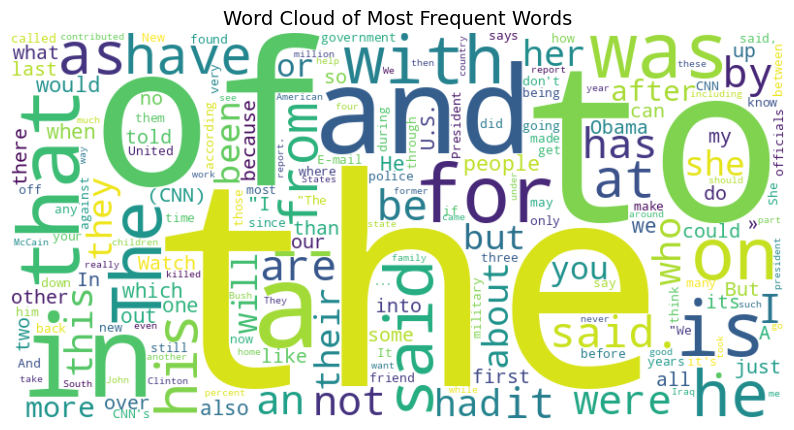

In [7]:
# Generate word frequencies
word_freq = Counter(text_data.split())

# Plot Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words", fontsize=14)
plt.show()

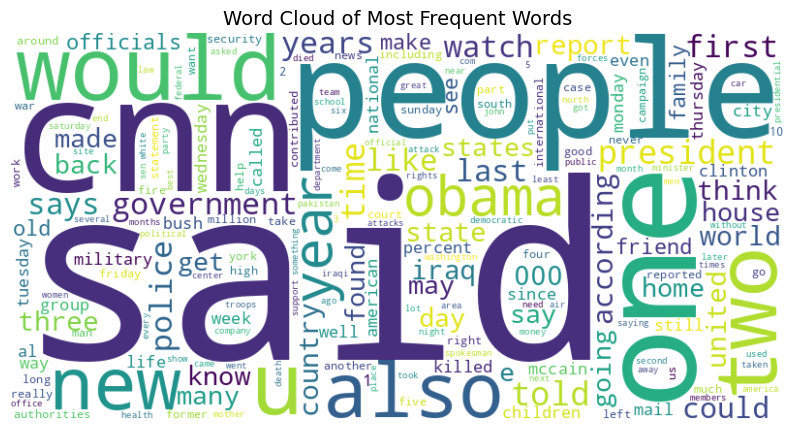

In [9]:
# Generate word frequencies
word_freq = Counter(cleaned_text.split())

# Plot Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words", fontsize=14)
plt.show()

# Data Preprocessing

In [24]:
print(cleaned_text[:5000])

london england reuters harry potter star daniel radcliffe gains access reported 20 million 41 1 million fortune turns 18 monday insists money cast spell daniel radcliffe harry potter harry potter order phoenix disappointment gossip columnists around world young actor says plans fritter cash away fast cars drink celebrity parties plan one people soon turn 18 suddenly buy massive sports car collection something similar told australian interviewer earlier month think particularly extravagant things like buying things cost 10 pounds books cds dvds 18 radcliffe able gamble casino buy drink pub see horror film hostel part ii currently six places number one movie uk box office chart details mark landmark birthday wraps agent publicist comment plans definitely sort party said interview hopefully none reading radcliffe earnings first five potter films held trust fund able touch despite growing fame riches actor says keeping feet firmly ground people always looking say kid star goes rails told r

# Clean data Word Cloud

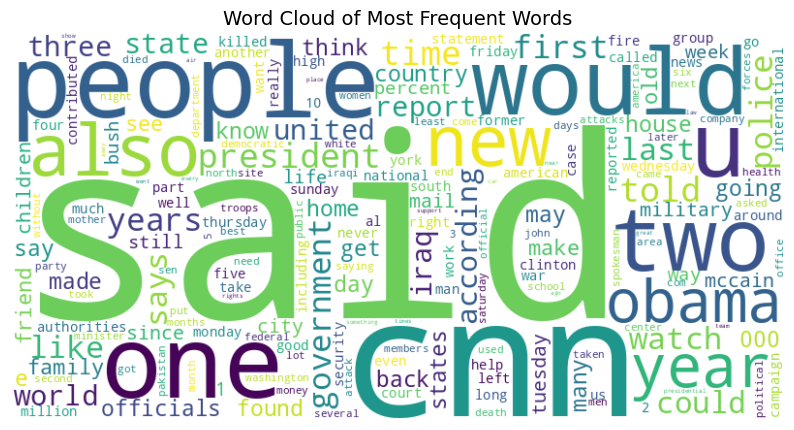

In [11]:
# Plot Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words", fontsize=14)
plt.show()

# Word Frequency graph

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


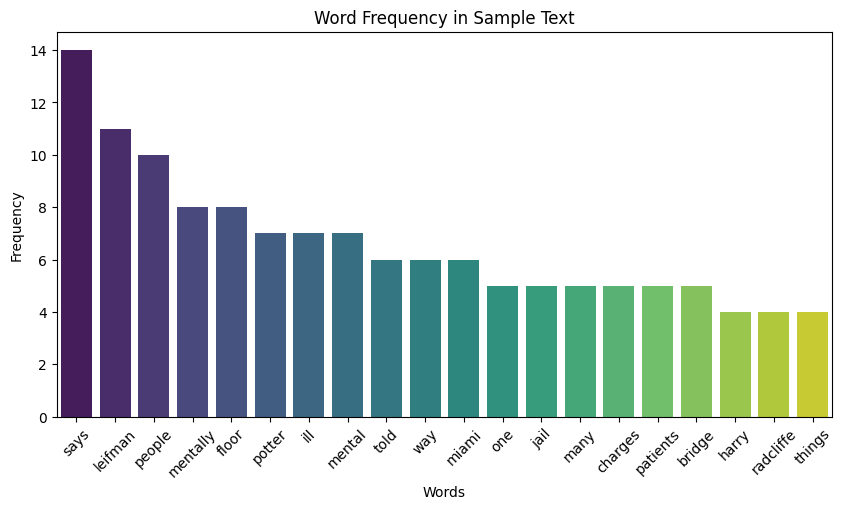

In [25]:
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

def plot_word_frequencies(text, title="Word Frequency Distribution"):
    words = preprocess_text(text)
    word_counts = Counter(words)
    common_words = word_counts.most_common(20)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(words), y=list(counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()


# Sample text (replace with actual data from your dataset)
sample_text = cleaned_text[:5000]
# Generate visualizations
plot_word_frequencies(sample_text, "Word Frequency in Sample Text")


# Importing Tokenizer

In [26]:
# Load T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Model loaded and using device: {device}")


Model loaded and using device: cuda


# Tokenizing Data

In [27]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Load CNN/DailyMail dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-small")

# Define a preprocessing function for tokenization
def preprocess_function(examples):
    inputs = ["summarize: " + article for article in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    labels = tokenizer(examples["highlights"], max_length=150, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

# Apply tokenization using .map()
tokenized_dataset = dataset.map(preprocess_function, batched=True)

print("Data tokenized successfully!")


Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Data tokenized successfully!


In [28]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Load only a subset of the dataset (e.g., 10,000 training samples, 2,000 test samples)
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Reduce dataset size
small_train = dataset["train"].shuffle(seed=42).select(range(10000))
small_test = dataset["test"].shuffle(seed=42).select(range(2000))

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-small")

# Preprocessing function
def preprocess_function(examples):
    inputs = ["summarize: " + article for article in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(examples["highlights"], max_length=150, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply tokenization
tokenized_train = small_train.map(preprocess_function, batched=True)
tokenized_test = small_test.map(preprocess_function, batched=True)

print("Dataset tokenized successfully!")


Dataset tokenized successfully!


# Passing wieghts and bias API key

In [29]:
import wandb

wandb.login(key="5def3487c6c793856b760687a6e481be35b8d804")



wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Training T5-small Transformer on our Data

In [49]:
import matplotlib.pyplot as plt
from transformers import TrainerCallback

# Custom Callback to store loss values
class LossHistoryCallback(TrainerCallback):
    def __init__(self):
        self.losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            self.losses.append(logs["loss"])

# Initialize loss tracker
loss_callback = LossHistoryCallback()


In [10]:
from transformers import TrainingArguments, Trainer

# Define Training Arguments for Small Dataset
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=4,  # Reduced batch size
    per_device_eval_batch_size=4,   # Reduced batch size
    learning_rate=3e-4,
    weight_decay=0.01,
    num_train_epochs=20,  # Fewer epochs for small dataset
    save_strategy="epoch",
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=500,
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,  # Using small_train dataset
    eval_dataset=tokenized_test,    # Using small_test dataset
    callbacks=[loss_callback],  # Attach loss callback
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,1.067000,1.016409
2,0.987600,1.020185
3,0.944900,1.030763
4,0.918100,1.035097
5,0.875700,1.048686
6,0.842100,1.058367
7,0.811500,1.078262
8,0.775500,1.082641
9,0.744600,1.089467
10,0.725400,1.102750


TrainOutput(global_step=50000, training_loss=0.7484524011230469, metrics={'train_runtime': 6746.4479, 'train_samples_per_second': 29.645, 'train_steps_per_second': 7.411, 'total_flos': 2.70683602944e+16, 'train_loss': 0.7484524011230469, 'epoch': 20.0})

# Plotting loss over time 

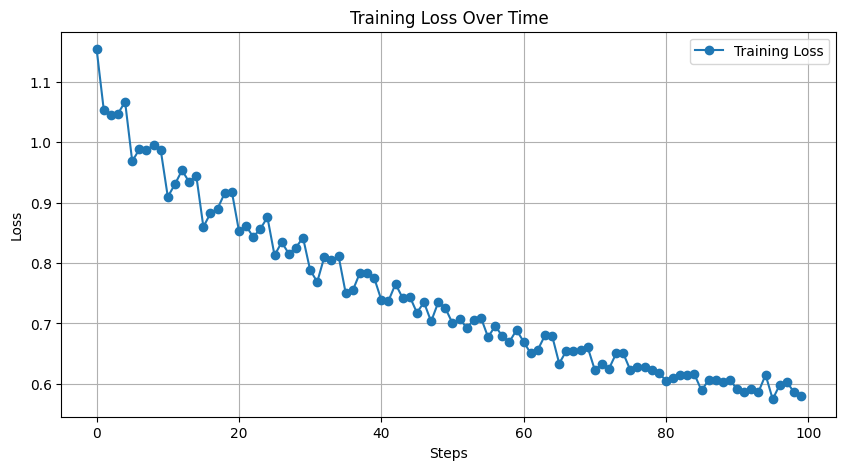

In [11]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(loss_callback.losses, label="Training Loss", marker="o", linestyle="-")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid()
plt.show()


In [34]:
!pip install evaluate rouge_score


In [15]:
from evaluate import load

# Load ROUGE metric
rouge = load("rouge")

print("ROUGE metric loaded successfully!")


ROUGE metric loaded successfully!


In [16]:
!pip install tqdm

# Saving the trained model

In [46]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Function to save model and tokenizer
def save_model(model, tokenizer, save_path="./saved_model"):
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"\n Model and tokenizer saved successfully at {save_path}!")


save_model(model, tokenizer)


 Model and tokenizer saved successfully at ./saved_model!


# Model Evaluation using ROGUE

In [17]:
from evaluate import load
import matplotlib.pyplot as plt
import numpy as np


# Load ROUGE metric
rouge = load("rouge")

def evaluate_model(predictions, references):
    scores = rouge.compute(predictions=predictions, references=references)
    return scores

print("Evaluation function defined successfully!")


Evaluation function defined successfully!


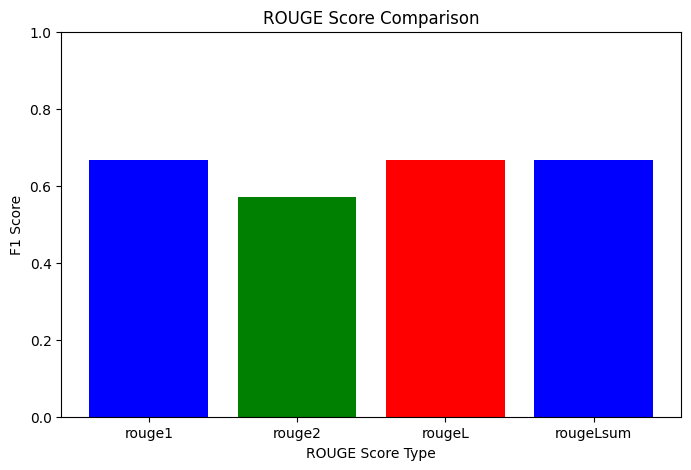


ROUGE scores plotted successfully!


In [22]:
import matplotlib.pyplot as plt

# Extract ROUGE scores
rouge_types = list(scores.keys())
rouge_values = [scores[key] for key in rouge_types]  # Directly use scores[key]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rouge_types, rouge_values, color=['blue', 'green', 'red'])
plt.xlabel("ROUGE Score Type")
plt.ylabel("F1 Score")
plt.title("ROUGE Score Comparison")
plt.ylim(0, 1)
plt.show()

print("\nROUGE scores plotted successfully!")


# Testing model on input Data

In [32]:
def summarize_text(text, model, tokenizer):
    inputs = tokenizer("summarize: " + text, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(device)

    # Generate summary
    summary_ids = model.generate(**inputs, max_length=150, num_beams=4, early_stopping=True)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Format output beautifully
    print("\n" + "=" * 80)
    print("INPUT TEXT:\n" + text)
    print("-" * 80)
    print("SUMMARY:\n" + " " * 5 + generated_summary + " " * 5)
    print("=" * 80 + "\n")

# Take user input
# user_text = input("Enter a long article to summarize:\n")
user_text="""Artificial Intelligence (AI) is revolutionizing various aspects of human life, including business, healthcare, education, and entertainment. AI-powered systems are now capable of performing tasks that were previously limited to human intelligence, such as speech recognition, language translation, decision-making, and even creative writing. Companies like Google, Microsoft, and OpenAI have developed advanced AI models that can analyze vast amounts of data, identify patterns, and generate insights at an unprecedented speed.

In the healthcare industry, AI has enabled early disease detection, personalized treatment plans, and robotic-assisted surgeries. AI-driven algorithms analyze medical images, helping doctors diagnose conditions like cancer and neurological disorders with higher accuracy. Additionally, wearable health devices powered by AI monitor patient vitals and provide real-time health recommendations.

The education sector has also benefited significantly from AI. AI-powered learning platforms personalize educational content for students, adapting to their learning pace and style. Virtual tutors and AI chatbots assist students in answering queries, making learning more interactive and accessible. However, concerns remain regarding the over-reliance on AI in education, as human interaction plays a crucial role in cognitive development.

While AI has led to significant advancements, it has also raised ethical and societal concerns. The automation of jobs threatens employment in various industries, leading to discussions about universal basic income and reskilling workers. Bias in AI models is another pressing issue, as AI systems trained on biased data can lead to discriminatory outcomes. Additionally, the rise of deepfake technology has sparked debates about misinformation and digital security.

Despite these challenges, AI continues to evolve rapidly. Researchers and policymakers are working on establishing regulations to ensure the ethical use of AI. Transparency in AI decision-making, data privacy protection, and responsible AI development are key areas of focus. As AI becomes more integrated into everyday life, balancing innovation with ethical considerations will be crucial for its sustainable growth."""


summarize_text(user_text, model, tokenizer)



INPUT TEXT:
Artificial Intelligence (AI) is revolutionizing various aspects of human life, including business, healthcare, education, and entertainment. AI-powered systems are now capable of performing tasks that were previously limited to human intelligence, such as speech recognition, language translation, decision-making, and even creative writing. Companies like Google, Microsoft, and OpenAI have developed advanced AI models that can analyze vast amounts of data, identify patterns, and generate insights at an unprecedented speed.

In the healthcare industry, AI has enabled early disease detection, personalized treatment plans, and robotic-assisted surgeries. AI-driven algorithms analyze medical images, helping doctors diagnose conditions like cancer and neurological disorders with higher accuracy. Additionally, wearable health devices powered by AI monitor patient vitals and provide real-time health recommendations.

The education sector has also benefited significantly from AI. A

In [51]:
def summarize_text(text, model, tokenizer):
    inputs = tokenizer("summarize: " + text, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(device)

    # Generate summary
    summary_ids = model.generate(**inputs, max_length=150, num_beams=4, early_stopping=True)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Format output beautifully
    print("\n" + "=" * 80)
    print("INPUT TEXT:\n" + text)
    print("-" * 80)
    print("SUMMARY:\n" + " " * 5 + generated_summary + " " * 5)
    print("=" * 80 + "\n")

# Take user input
user_text = input("Enter a long article to summarize:\n")


summarize_text(user_text, model, tokenizer)


Enter a long article to summarize:
 Elon Reeve Musk (/ˈiːlɒn/ EE-lon; born June 28, 1971) is a businessman known for his key roles in Tesla, Inc., SpaceX, and Twitter (which he rebranded as X). Since 2025, he has been a senior advisor to United States president Donald Trump and de facto head of the Department of Government Efficiency (DOGE). Musk is the wealthiest person in the world; as of February 2025, Forbes estimates his net worth to be US$353 billion.  Born to a prominent family in Pretoria, South Africa, Musk emigrated to Canada in 1989 and acquired its citizenship though his mother. He moved to the U.S. and graduated from the University of Pennsylvania before moving to California to pursue business ventures. In 1995, Musk co-founded the software company Zip2. After its sale in 1999, he co-founded X.com, an online payment company that later merged to form PayPal, which was acquired by eBay in 2002 for $1.5 billion. That year, Musk also became a U.S. citizen.  In 2002, Musk found


INPUT TEXT:
Elon Reeve Musk (/ˈiːlɒn/ EE-lon; born June 28, 1971) is a businessman known for his key roles in Tesla, Inc., SpaceX, and Twitter (which he rebranded as X). Since 2025, he has been a senior advisor to United States president Donald Trump and de facto head of the Department of Government Efficiency (DOGE). Musk is the wealthiest person in the world; as of February 2025, Forbes estimates his net worth to be US$353 billion.  Born to a prominent family in Pretoria, South Africa, Musk emigrated to Canada in 1989 and acquired its citizenship though his mother. He moved to the U.S. and graduated from the University of Pennsylvania before moving to California to pursue business ventures. In 1995, Musk co-founded the software company Zip2. After its sale in 1999, he co-founded X.com, an online payment company that later merged to form PayPal, which was acquired by eBay in 2002 for $1.5 billion. That year, Musk also became a U.S. citizen.  In 2002, Musk founded SpaceX and became it

In [52]:
def summarize_text(text, model, tokenizer):
    inputs = tokenizer("summarize: " + text, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(device)

    # Generate summary
    summary_ids = model.generate(**inputs, max_length=150, num_beams=4, early_stopping=True)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Format output beautifully
    print("\n" + "=" * 80)
    print("INPUT TEXT:\n" + text)
    print("-" * 80)
    print("SUMMARY:\n" + " " * 5 + generated_summary + " " * 5)
    print("=" * 80 + "\n")

# Take user input
user_text = input("Enter a long article to summarize:\n")

summarize_text(user_text, model, tokenizer)


Enter a long article to summarize:
 ChatGPT is a generative artificial intelligence chatbot developed by OpenAI and launched in 2022. It is currently based on the GPT-4o large language model (LLM). ChatGPT can generate human-like conversational responses and enables users to refine and steer a conversation towards a desired length, format, style, level of detail, and language.[2] It is credited with accelerating the AI boom, which has led to ongoing rapid investment in and public attention to the field of artificial intelligence (AI).[3] Some observers have raised concern about the potential of ChatGPT and similar programs to displace human intelligence, enable plagiarism, or fuel misinformation.[4][5]  ChatGPT is built on OpenAI's proprietary series of generative pre-trained transformer (GPT) models and is fine-tuned for conversational applications using a combination of supervised learning and reinforcement learning from human feedback.[4] Successive user prompts and replies are cons


INPUT TEXT:
ChatGPT is a generative artificial intelligence chatbot developed by OpenAI and launched in 2022. It is currently based on the GPT-4o large language model (LLM). ChatGPT can generate human-like conversational responses and enables users to refine and steer a conversation towards a desired length, format, style, level of detail, and language.[2] It is credited with accelerating the AI boom, which has led to ongoing rapid investment in and public attention to the field of artificial intelligence (AI).[3] Some observers have raised concern about the potential of ChatGPT and similar programs to displace human intelligence, enable plagiarism, or fuel misinformation.[4][5]  ChatGPT is built on OpenAI's proprietary series of generative pre-trained transformer (GPT) models and is fine-tuned for conversational applications using a combination of supervised learning and reinforcement learning from human feedback.[4] Successive user prompts and replies are considered at each conversa

In [53]:
def summarize_text(text, model, tokenizer):
    inputs = tokenizer("summarize: " + text, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(device)

    # Generate summary
    summary_ids = model.generate(**inputs, max_length=150, num_beams=4, early_stopping=True)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Format output beautifully
    print("\n" + "=" * 80)
    print("INPUT TEXT:\n" + text)
    print("-" * 80)
    print("SUMMARY:\n" + " " * 5 + generated_summary + " " * 5)
    print("=" * 80 + "\n")

# Take user input
user_text = input("Enter a long article to summarize:\n")

summarize_text(user_text, model, tokenizer)


Enter a long article to summarize:
 Apple Inc. is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley. It is best known for its consumer electronics, software, and services. Founded in 1976 as Apple Computer Company by Steve Jobs, Steve Wozniak and Ronald Wayne, the company was incorporated by Jobs and Wozniak as Apple Computer, Inc. the following year. It was renamed Apple Inc. in 2007 as the company had expanded its focus from computers to consumer electronics. Apple is the largest technology company by revenue, with US$391.04 billion in the 2024 fiscal year.  The company was founded to produce and market Wozniak's Apple I personal computer. Its second computer, the Apple II, became a best seller as one of the first mass-produced microcomputers. Apple introduced the Lisa in 1983 and the Macintosh in 1984, as some of the first computers to use a graphical user interface and a mouse. By 1985, internal company problems led to Jobs leavi


INPUT TEXT:
Apple Inc. is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley. It is best known for its consumer electronics, software, and services. Founded in 1976 as Apple Computer Company by Steve Jobs, Steve Wozniak and Ronald Wayne, the company was incorporated by Jobs and Wozniak as Apple Computer, Inc. the following year. It was renamed Apple Inc. in 2007 as the company had expanded its focus from computers to consumer electronics. Apple is the largest technology company by revenue, with US$391.04 billion in the 2024 fiscal year.  The company was founded to produce and market Wozniak's Apple I personal computer. Its second computer, the Apple II, became a best seller as one of the first mass-produced microcomputers. Apple introduced the Lisa in 1983 and the Macintosh in 1984, as some of the first computers to use a graphical user interface and a mouse. By 1985, internal company problems led to Jobs leaving to form NeXT, Inc., 

# Running saved model

Run this cell to test the model's performance

In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the saved model and tokenizer
model_path = "/kaggle/working/saved_model"
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Function to summarize text
def summarize_text(text, model, tokenizer):
    inputs = tokenizer("summarize: " + text, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(device)

    # Generate summary
    summary_ids = model.generate(**inputs, max_length=150, num_beams=4, early_stopping=True)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Format output beautifully
    print("\n" + "=" * 80)
    print("INPUT TEXT:\n" + text)
    print("-" * 80)
    print("SUMMARY:\n" + " " * 5 + generated_summary + " " * 5)
    print("=" * 80 + "\n")

# Take user input
user_text = input("Enter a long article to summarize:\n")

summarize_text(user_text, model, tokenizer)


# Evaluating ROGUE score on Test cases

In [38]:
import torch
import evaluate
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ROUGE metric
rouge = evaluate.load("rouge")

# Evaluation function
def evaluate_model(dataset, model, tokenizer, num_samples=100):
    model.eval()
    predictions = []
    references = []

    for i in tqdm(range(num_samples)):
        input_text = dataset["article"][i]  # Correct field name
        reference_summary = dataset["highlights"][i]  # Fix: Use 'highlights' instead of 'summary'

        # Tokenize input and move to device
        inputs = tokenizer("summarize: " + input_text, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(device)

        # Generate summary
        with torch.no_grad():  # Disable gradient calculations for efficiency
            summary_ids = model.generate(**inputs, max_length=150, num_beams=4, early_stopping=True)
        
        generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

        predictions.append(generated_summary)
        references.append(reference_summary)

    # Compute ROUGE scores
    scores = rouge.compute(predictions=predictions, references=references)

    print("\nEvaluation Results:")
    print(scores)

# Run evaluation with 200 samples
evaluate_model(dataset["test"], model, tokenizer, num_samples=200)


100%|██████████| 200/200 [02:12<00:00,  1.51it/s]



Evaluation Results:
{'rouge1': 0.29920503060721465, 'rouge2': 0.10976206409904779, 'rougeL': 0.2233748916780029, 'rougeLsum': 0.25234630081004517}


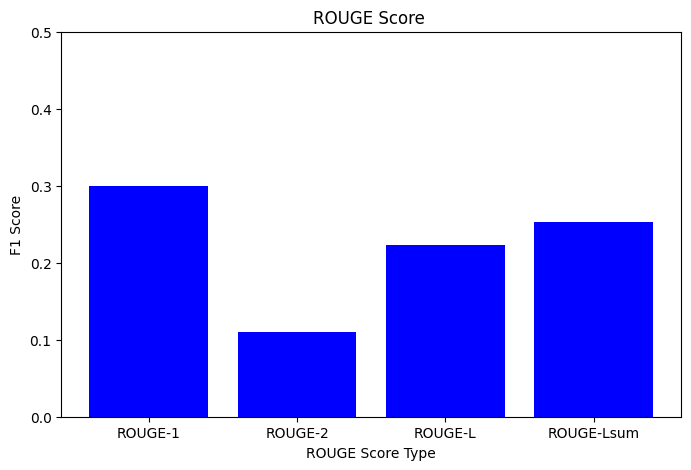


ROUGE scores plotted successfully!


In [50]:
import matplotlib.pyplot as plt

# Store ROUGE scores
rouge_scores = {
    "ROUGE-1": 0.2992,
    "ROUGE-2": 0.1098,
    "ROUGE-L": 0.2234,
    "ROUGE-Lsum": 0.2523
}

# Extract keys and values for plotting
rouge_types = list(rouge_scores.keys())
rouge_values = list(rouge_scores.values())

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rouge_types, rouge_values, color=['blue', 'blue', 'blue', 'blue'])
plt.xlabel("ROUGE Score Type")
plt.ylabel("F1 Score")
plt.title("ROUGE Score ")
plt.ylim(0, 0.5)
plt.show()

print("\nROUGE scores plotted successfully!")


# Implementing BART Model

In [30]:
model_name = "facebook/bart-base"  

In [31]:
from transformers import Seq2SeqTrainingArguments

model_name = "facebook/bart-base"  # Bart is a sequence-to-sequence model

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",                    # <== updated here
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=3e-4,
    weight_decay=0.01,
    num_train_epochs=20,
    save_strategy="epoch",
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=100,
    predict_with_generate=True,
    generation_max_length=150,
    generation_num_beams=4,
    report_to="none"
)


In [32]:
from transformers import Trainer
import numpy as np
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer
)

train_result = trainer.train()


<ipython-input-32-2aa2fac995f0>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,1.084800,1.016409
2,0.981600,1.020185
3,0.919900,1.030763
4,0.917700,1.035097
5,0.906000,1.048686
6,0.847500,1.058367
7,0.786200,1.078262
8,0.789500,1.082641
9,0.719100,1.089467
10,0.740000,1.102750


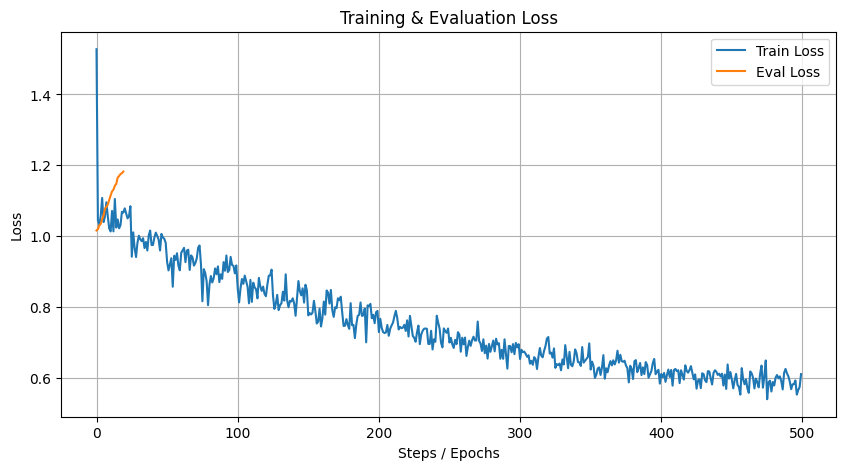

In [34]:
import matplotlib.pyplot as plt

log_history = trainer.state.log_history
train_loss = [x["loss"] for x in log_history if "loss" in x]
eval_loss = [x["eval_loss"] for x in log_history if "eval_loss" in x]

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(eval_loss, label="Eval Loss")
plt.xlabel("Steps / Epochs")
plt.ylabel("Loss")
plt.title("Training & Evaluation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
!pip install datasets evaluate
!pip install rouge_score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=7e078c06109646c09b3916d8fbcf39504c97632cd53839b12c2cbc59aa1e3cee
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [39]:
# Install if needed
# !pip install evaluate

import evaluate
import nltk
nltk.download("punkt")

# Load ROUGE metric
rouge = evaluate.load("rouge")

def generate_summary(batch):
    inputs = tokenizer(batch["article"], return_tensors="pt", padding=True, truncation=True, max_length=512).to(model.device)
    summary_ids = model.generate(inputs["input_ids"], max_length=128, num_beams=4)
    return tokenizer.batch_decode(summary_ids, skip_special_tokens=True)

# Select a small subset for fast evaluation
subset = dataset["test"].select(range(100))
pred_summaries = generate_summary(subset)
ref_summaries = [x["highlights"] for x in subset]

# Compute ROUGE
rouge_score = rouge.compute(predictions=pred_summaries, references=ref_summaries)
print(rouge_score)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
{'rouge1': 0.31653501724287997, 'rouge2': 0.12560887841233825, 'rougeL': 0.23264855215099006, 'rougeLsum': 0.2683468602297654}


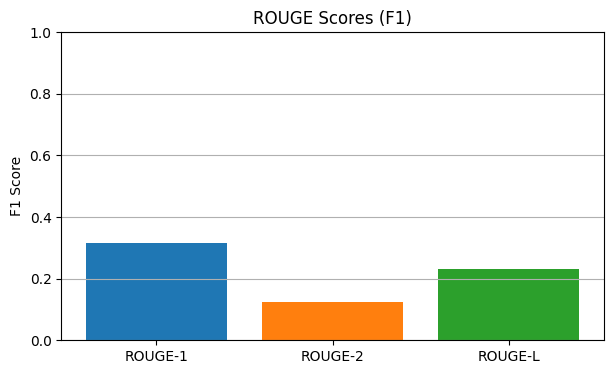

In [41]:
import matplotlib.pyplot as plt

labels = ["ROUGE-1", "ROUGE-2", "ROUGE-L"]
scores = [
    rouge_score["rouge1"],
    rouge_score["rouge2"],
    rouge_score["rougeL"]
]

plt.figure(figsize=(7, 4))
plt.bar(labels, scores, color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.ylim(0, 1)
plt.title("ROUGE Scores (F1)")
plt.ylabel("F1 Score")
plt.grid(True, axis="y")
plt.show()


# Testing BART model

In [42]:
import torch

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Summary function for BART
def summarize_text_bart(text, model, tokenizer):
    # Tokenize input
    inputs = tokenizer(
        text,
        return_tensors="pt",
        max_length=1024,
        truncation=True,
        padding="max_length"
    ).to(device)

    # Generate summary
    summary_ids = model.generate(
        **inputs,
        max_length=150,
        num_beams=4,
        early_stopping=True
    )
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Print beautifully
    print("\n" + "=" * 100)
    print("INPUT TEXT:\n" + text)
    print("-" * 100)
    print("SUMMARY:\n" + " " * 5 + generated_summary + " " * 5)
    print("=" * 100 + "\n")

# Example article
user_text = """Artificial Intelligence (AI) is revolutionizing various aspects of human life, including business, healthcare, education, and entertainment. AI-powered systems are now capable of performing tasks that were previously limited to human intelligence, such as speech recognition, language translation, decision-making, and even creative writing. Companies like Google, Microsoft, and OpenAI have developed advanced AI models that can analyze vast amounts of data, identify patterns, and generate insights at an unprecedented speed.

In the healthcare industry, AI has enabled early disease detection, personalized treatment plans, and robotic-assisted surgeries. AI-driven algorithms analyze medical images, helping doctors diagnose conditions like cancer and neurological disorders with higher accuracy. Additionally, wearable health devices powered by AI monitor patient vitals and provide real-time health recommendations.

The education sector has also benefited significantly from AI. AI-powered learning platforms personalize educational content for students, adapting to their learning pace and style. Virtual tutors and AI chatbots assist students in answering queries, making learning more interactive and accessible. However, concerns remain regarding the over-reliance on AI in education, as human interaction plays a crucial role in cognitive development.

While AI has led to significant advancements, it has also raised ethical and societal concerns. The automation of jobs threatens employment in various industries, leading to discussions about universal basic income and reskilling workers. Bias in AI models is another pressing issue, as AI systems trained on biased data can lead to discriminatory outcomes. Additionally, the rise of deepfake technology has sparked debates about misinformation and digital security.

Despite these challenges, AI continues to evolve rapidly. Researchers and policymakers are working on establishing regulations to ensure the ethical use of AI. Transparency in AI decision-making, data privacy protection, and responsible AI development are key areas of focus. As AI becomes more integrated into everyday life, balancing innovation with ethical considerations will be crucial for its sustainable growth."""

# Call the summary function
summarize_text_bart(user_text, model, tokenizer)



INPUT TEXT:
Artificial Intelligence (AI) is revolutionizing various aspects of human life, including business, healthcare, education, and entertainment. AI-powered systems are now capable of performing tasks that were previously limited to human intelligence, such as speech recognition, language translation, decision-making, and even creative writing. Companies like Google, Microsoft, and OpenAI have developed advanced AI models that can analyze vast amounts of data, identify patterns, and generate insights at an unprecedented speed.

In the healthcare industry, AI has enabled early disease detection, personalized treatment plans, and robotic-assisted surgeries. AI-driven algorithms analyze medical images, helping doctors diagnose conditions like cancer and neurological disorders with higher accuracy. Additionally, wearable health devices powered by AI monitor patient vitals and provide real-time health recommendations.

The education sector has also benefited significantly from AI. A

In [44]:
import torch

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Summary function for BART
def summarize_text_bart(text, model, tokenizer):
    # Tokenize input
    inputs = tokenizer(
        text,
        return_tensors="pt",
        max_length=1024,
        truncation=True,
        padding="max_length"
    ).to(device)

    # Generate summary
    summary_ids = model.generate(
        **inputs,
        max_length=150,
        num_beams=4,
        early_stopping=True
    )
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Print beautifully
    print("\n" + "=" * 100)
    print("INPUT TEXT:\n" + text)
    print("-" * 100)
    print("SUMMARY:\n" + " " * 5 + generated_summary + " " * 5)
    print("=" * 100 + "\n")

# Example article
user_text = """Apple Inc. is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley. It is best known for its consumer electronics, software, and services. Founded in 1976 as Apple Computer Company by Steve Jobs, Steve Wozniak and Ronald Wayne, the company was incorporated by Jobs and Wozniak as Apple Computer, Inc. the following year. It was renamed Apple Inc. in 2007 as the company had expanded its focus from computers to consumer electronics. Apple is the largest technology company by revenue, with US$391.04 billion in the 2024 fiscal year.  The company was founded to produce and market Wozniak's Apple I personal computer. Its second computer, the Apple II, became a best seller as one of the first mass-produced microcomputers. Apple introduced the Lisa in 1983 and the Macintosh in 1984, as some of the first computers to use a graphical user interface and a mouse. By 1985, internal company problems led to Jobs leaving to form NeXT, Inc., and Wozniak withdrawing to other ventures; John Sculley served as long-time CEO for over a decade. In the 1990s, Apple lost considerable market share in the personal computer industry to the lower-priced Wintel duopoly of the Microsoft Windows operating system on Intel-powered PC clones. In 1997, Apple was weeks away from bankruptcy. To resolve its failed operating system strategy, it bought NeXT, effectively bringing Jobs back to the company, who guided Apple back to profitability over the next decade with the introductions of the iMac, iPod, iPhone, and iPad devices to critical acclaim as well as the iTunes Store, launching the "Think different" advertising campaign, and opening the Apple Store retail chain. These moves elevated Apple to consistently be one of the world's most valuable brands since about 2010. Jobs resigned in 2011 for health reasons, and died two months later; he was succeeded as CEO by Tim Cook.  Apple's current product lineup includes portable and home hardware such as the iPhone, iPad, Apple Watch, Mac, and Apple TV; operating systems such as iOS, iPadOS, and macOS; and various software and services including Apple Pay, iCloud, and multimedia streaming services like Apple Music and Apple TV+. Apple is one of the Big Five American information technology companies;[a] for the most part since 2011,[b] Apple has been the world's largest company by market capitalization, and, as of 2023, is the largest manufacturing company by revenue, the fourth-largest personal computer vendor by unit sales, the largest vendor of tablet computers, and the largest vendor of mobile phones in the world. Apple became the first publicly traded U.S. company to be valued at over $1 trillion in 2018, and, as of December 2024, is valued at just over $3.74 trillion.  Apple has received criticism regarding its contractors' labor practices, its relationship with trade unions, its environmental practices, and its business ethics, including anti-competitive practices and materials sourcing. Nevertheless, the company has a large following and enjoys a high level of brand loyalty."""

# Call the summary function
summarize_text_bart(user_text, model, tokenizer)



INPUT TEXT:
Apple Inc. is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley. It is best known for its consumer electronics, software, and services. Founded in 1976 as Apple Computer Company by Steve Jobs, Steve Wozniak and Ronald Wayne, the company was incorporated by Jobs and Wozniak as Apple Computer, Inc. the following year. It was renamed Apple Inc. in 2007 as the company had expanded its focus from computers to consumer electronics. Apple is the largest technology company by revenue, with US$391.04 billion in the 2024 fiscal year.  The company was founded to produce and market Wozniak's Apple I personal computer. Its second computer, the Apple II, became a best seller as one of the first mass-produced microcomputers. Apple introduced the Lisa in 1983 and the Macintosh in 1984, as some of the first computers to use a graphical user interface and a mouse. By 1985, internal company problems led to Jobs leaving to form NeXT, Inc., 